In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Note that the proper cleaning of data is already done in the credit_risk_lr and the csv file directly read here for modeling
cr_loan_clean = pd.read_csv("cr_loan_w2.csv")

In [3]:

train_col  = list(cr_loan_clean.columns)



In [5]:
train_col  = list(cr_loan_clean.columns)
del train_col[5]

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# choose only numeric data to train

train_col_num = cr_loan_clean.select_dtypes(exclude=['object'])

# Create the X and y data sets
X = train_col_num
y = cr_loan_clean[['loan_status']]

# Use test_train_split to create the training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=123)

In [8]:
# Train a model
import xgboost as xgb
clf_gbt = xgb.XGBClassifier().fit(X_train, np.ravel(y_train))

# Predict with a model
gbt_preds = clf_gbt.predict_proba(X_test)

# Create dataframes of first five predictions, and first five true labels
preds_df = pd.DataFrame(gbt_preds[:,1][0:5], columns = ['prob_default'])
true_df = y_test.head()

# Concatenate and print the two data frames for comparison
print(pd.concat([true_df.reset_index(drop = True), preds_df], axis = 1))

[02:23:14] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
   loan_status  prob_default
0            1      0.999820
1            1      0.999805
2            0      0.000075
3            0      0.000058
4            1      0.999659


In [9]:
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import confusion_matrix
# Predict the labels for loan status
gbt_preds = clf_gbt.predict(X_test)

# Check the values created by the predict method
print(gbt_preds)

# Print the classification report of the model
target_names = ['Non-Default', 'Default']
print(classification_report(y_test, gbt_preds, target_names=target_names))

[1 1 0 ... 0 0 0]
              precision    recall  f1-score   support

 Non-Default       1.00      1.00      1.00      9198
     Default       1.00      1.00      1.00      2586

    accuracy                           1.00     11784
   macro avg       1.00      1.00      1.00     11784
weighted avg       1.00      1.00      1.00     11784



In [10]:
# Print the column importances from the model
print(clf_gbt.get_booster().get_score(importance_type = 'weight'))

{'loan_status': 30, 'loan_int_rate': 3, 'loan_percent_income': 3, 'person_home_ownership_RENT': 1, 'person_income': 1}


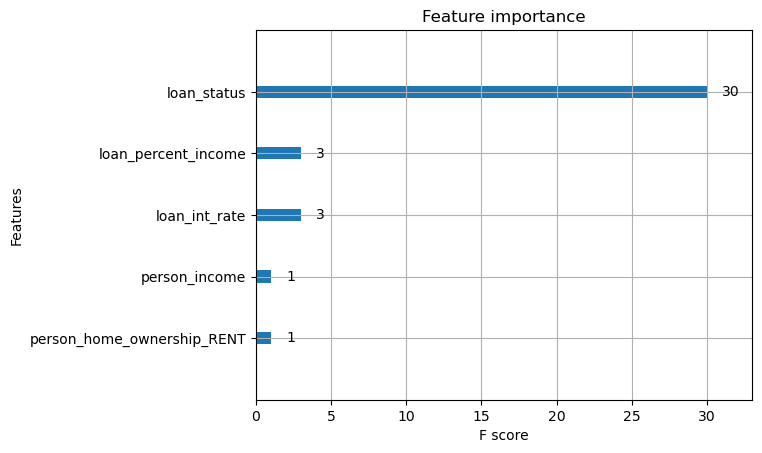

In [12]:
# Plot the column importance for this model
xgb.plot_importance(clf_gbt, importance_type = 'weight')
plt.show()

In [13]:
params = {'objective': 'binary:logistic', 'seed': 123, 'eval_metric': 'auc'}

In [14]:
# Set the values for number of folds and stopping iterations
n_folds = 5
early_stopping = 10

#print parms
print(params)

# Create the DTrain matrix for XGBoost
DTrain = xgb.DMatrix(X_train, label = y_train)

# Create the data frame of cross validations
cv_df = xgb.cv(params, DTrain, num_boost_round = 5, nfold=n_folds,
            early_stopping_rounds=early_stopping)

# Print the cross validations data frame
print(cv_df)

{'objective': 'binary:logistic', 'seed': 123, 'eval_metric': 'auc'}
   train-auc-mean  train-auc-std  test-auc-mean  test-auc-std
0             1.0            0.0            1.0           0.0
1             1.0            0.0            1.0           0.0
2             1.0            0.0            1.0           0.0
3             1.0            0.0            1.0           0.0
4             1.0            0.0            1.0           0.0


   train-auc-mean  train-auc-std  test-auc-mean  test-auc-std
0             1.0            0.0            1.0           0.0
1             1.0            0.0            1.0           0.0
2             1.0            0.0            1.0           0.0
3             1.0            0.0            1.0           0.0
4             1.0            0.0            1.0           0.0
1.0


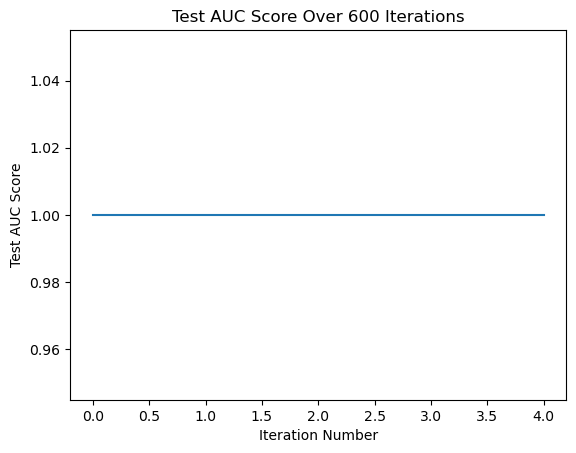

In [17]:
# Print the first five rows of the CV results data frame
print(cv_df.head())

# Calculate the mean of the test AUC scores
print(np.mean(cv_df['test-auc-mean']).round(2))

# Plot the test AUC scores for each iteration
plt.plot(cv_df['test-auc-mean'])
plt.title('Test AUC Score Over 600 Iterations')
plt.xlabel('Iteration Number')
plt.ylabel('Test AUC Score')
plt.show()

In [19]:
from sklearn.model_selection import cross_val_score
# Create a gradient boosted tree model using two hyperparameters
gbt = xgb.XGBClassifier(learning_rate = 0.1, max_depth = 7)

# Calculate the cross validation scores for 4 folds
cv_scores = cross_val_score(gbt, X_train, np.ravel(y_train), cv = 4)

# Print the cross validation scores
print(cv_scores)

# Print the average accuracy and standard deviation of the scores
print("Average accuracy: %0.2f (+/- %0.2f)" % (cv_scores.mean(),
                                              cv_scores.std() * 2))

[02:39:52] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[02:40:00] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[02:40:03] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[02:40:06] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be